In [1]:
import pandas as pd
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B000YHLS8W,A3G6BO26IVY6LE,BV,0,1,3,1323302400,Seven Whole Grains,If you like the taste of seven whole grains on...
1,2,B000YHLS8W,A20J70GXDB02N2,"TrailWinds ""tbb""",0,1,5,1319068800,Excellent treat except this is not USDA Organic,The only way to improve upon these cookies is ...
2,3,B000YHLS8W,A29480HO2LME6S,Mom 24/7/365,0,1,3,1317945600,The cookie crumbles,I really enjoy Kashi products. And oatmeal da...
3,4,B000YHLS8W,A353IGB70SOJDA,Lori,0,1,5,1316649600,TLC Cookies,These cookies surprising taste pretty well for...
4,5,B000YHLS8W,A3LQL69LD7YH4I,Amy,0,1,3,1315785600,Good,It's not as sweet as most chocolate chips. Due...


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
fig = px.histogram(df, x="Score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


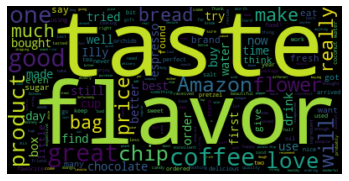

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud.png')
plt.show()

In [4]:
df = df[df['Score'] != 3]
df['Sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
1,2,B000YHLS8W,A20J70GXDB02N2,"TrailWinds ""tbb""",0,1,5,1319068800,Excellent treat except this is not USDA Organic,The only way to improve upon these cookies is ...,1
3,4,B000YHLS8W,A353IGB70SOJDA,Lori,0,1,5,1316649600,TLC Cookies,These cookies surprising taste pretty well for...,1
5,6,B000YHLS8W,AML16N9LK44O5,Troy Victor,0,1,2,1315699200,Arrived crumbled and not so tasty,Many of the cookies in the packs were broken a...,-1
7,8,B000YHLS8W,A1U6NV8I65IYY8,Kiwi,0,2,4,1345507200,They forgot to send my gift card,I sent these as a gift. They forgot to send my...,1
8,9,B000YHLS8W,AYW7A0KP2WG2B,Kristen Stemple,0,2,2,1327536000,Grab and go items for breakfast,I bought these to have grab and go items for b...,-1


In [6]:
positive = df[df['Sentiment'] == 1]
negative = df[df['Sentiment'] == -1]

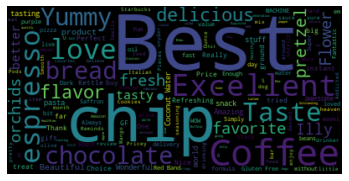

In [7]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 
pos = " ".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

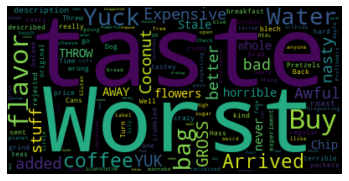

In [9]:
neg = " ".join(review for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud_negative.png')
plt.show()

In [10]:
df['Sentimentt'] = df['Sentiment'].replace({-1 : 'negative'})
df['Sentimentt'] = df['Sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="Sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [11]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

In [12]:
dfNew = df[['Summary','Sentiment']]
dfNew.head()

,Summary,Sentiment
1,Excellent treat except this is not USDA Organic,1
3,TLC Cookies,1
5,Arrived crumbled and not so tasty,-1
7,They forgot to send my gift card,1
8,Grab and go items for breakfast,-1


In [13]:
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [16]:
X_train = train_matrix
X_test = test_matrix
y_train = train['Sentiment']
y_test = test['Sentiment']

In [17]:
lr.fit(X_train,y_train)

LogisticRegression()

In [18]:
predictions = lr.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 1,  0],
       [15, 82]], dtype=int64)

In [20]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.06      1.00      0.12         1
           1       1.00      0.85      0.92        97

    accuracy                           0.85        98
   macro avg       0.53      0.92      0.52        98
weighted avg       0.99      0.85      0.91        98

